#                                                     Netflix Business Case

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [82]:
df=pd.read_csv('netflix.csv')

In [83]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [84]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [85]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [86]:
df.size

105684

In [87]:
df.ndim

2

In [88]:
df.shape


(8807, 12)

# Unnesting values

In [89]:
df['director']=df['director'].str.split(',')

In [90]:
df1=df.explode('director')

In [91]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [92]:
df1.shape

(9612, 12)

# for cast

In [93]:
df1['cast']=df1['cast'].str.split(',')

In [94]:
df2=df1.explode('cast')

In [95]:
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [96]:
df2.shape

(70812, 12)

# for country

In [97]:
df2['country']=df['country'].str.split(',')

In [98]:
df3=df2.explode('country')

In [99]:
df3.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [100]:
df3.shape

(89415, 12)

# for listed_in

In [101]:
df3['listed_in']=df3['listed_in'].str.split(',')

In [102]:
final=df3.explode('listed_in')

In [103]:
final.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [104]:
final.shape

(202065, 12)

# spliting duration

In [105]:
final['duration']=final['duration'].str.split().str[0]

In [106]:
final.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [107]:
final.drop(['description'],axis=1,inplace=True)

In [108]:
final.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,TV Dramas
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,TV Mysteries
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows


In [109]:
# filling nan

In [110]:
final.isnull().sum()

show_id             0
type                0
title               0
director        50643
cast             2149
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
dtype: int64

In [111]:
final.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries


In [112]:
final['director'].fillna('Unknown director',inplace=True)
final['cast'].fillna('Unknown cast',inplace=True)
final['country'].fillna('Unknown country',inplace=True)
final['rating'].fillna('Unknown rating',inplace=True)
final['duration'].fillna('Unknown duration',inplace=True)

In [113]:
final.isna().sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added      158
release_year      0
rating            0
duration          0
listed_in         0
dtype: int64

In [114]:
final['date_added']=pd.to_datetime(df['date_added'],format='mixed')

In [115]:
f=final['date_added'].mode()

In [116]:
f

0   2020-01-01
Name: date_added, dtype: datetime64[ns]

In [117]:
final['date_added'].fillna('2020-01-01',inplace=True)

In [118]:
final.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [119]:
final.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90,Documentaries
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries
1,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows


In [120]:
final['date_added'].fillna('2020-01-01',inplace=True)

In [121]:
final['added_year']=pd.to_datetime(final['date_added']).dt.year

In [122]:
final['week']=pd.to_datetime(final['date_added']).dt.isocalendar().week
final.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,added_year,week
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90,Documentaries,2021,38
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,2021,38
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,2021,38
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,2021,38
1,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,2021,38


# Final csv

In [123]:
final.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,added_year,week
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90,Documentaries,2021,38
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,2021,38
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,2021,38
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,2021,38
1,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,2021,38


In [124]:
final.shape

(202065, 13)

In [125]:
final.describe()

,date_added,release_year,added_year,week
count,202065,202065.000000,202065.000000,202065.0
mean,2019-06-19 16:51:44.268428800,2013.448950,2018.966248,26.678217
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.0
25%,2018-06-26 00:00:00,2012.000000,2018.000000,14.0
50%,2019-09-06 00:00:00,2016.000000,2019.000000,27.0
75%,2020-09-10 00:00:00,2019.000000,2020.000000,39.0
max,2021-09-25 00:00:00,2021.000000,2021.000000,53.0
std,NaN,9.013616,1.551317,15.062558


In [126]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202065 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      202065 non-null  object        
 4   cast          202065 non-null  object        
 5   country       202065 non-null  object        
 6   date_added    202065 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        202065 non-null  object        
 9   duration      202065 non-null  object        
 10  listed_in     202065 non-null  object        
 11  added_year    202065 non-null  int32         
 12  week          202065 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 20.2+ MB


In [127]:
final.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
added_year               int32
week                    UInt32
dtype: object

In [128]:
final.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,added_year,week
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90,Documentaries,2021,38
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,2021,38
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,2021,38
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,2021,38
1,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,2021,38


### Q1. Find the counts of each categorical variable both using graphical and non graphical analysis. 
###    a. For Non-graphical Analysis: 

In [129]:

# for type
final['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [130]:
# for title
final['title'].nunique()

8807

In [131]:
# for director
final['director'].nunique()

5121

In [132]:
# fro caster:
final['cast'].nunique()

39297

In [133]:
# for country

In [134]:
final['country'].nunique()

198

In [135]:
# for date
final['date_added'].max(),final['date_added'].min()

(Timestamp('2021-09-25 00:00:00'), Timestamp('2008-01-01 00:00:00'))

In [136]:
# for rating
final['rating'].nunique()

18

In [187]:
# for listed_in
final['listed_in'].unique()
final['listed_in'].nunique()

73

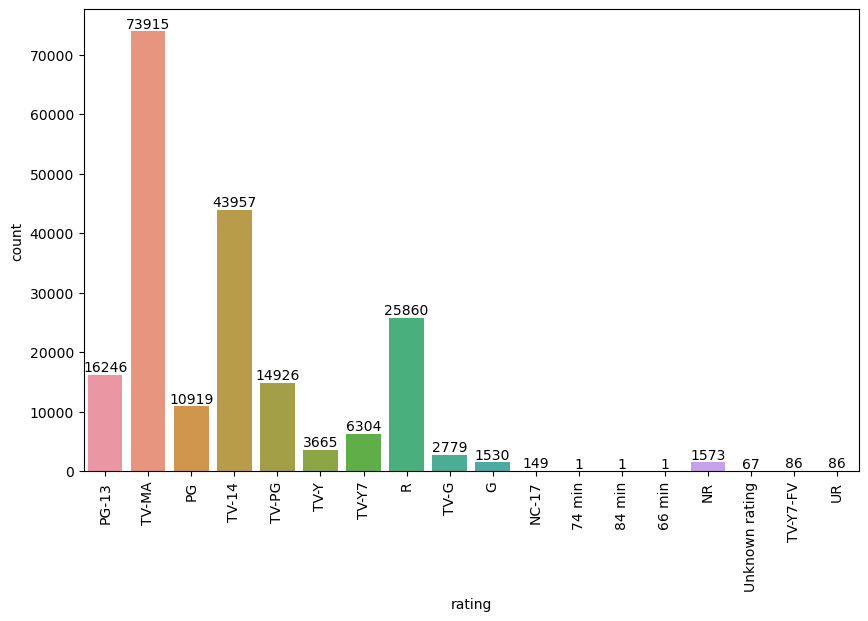

In [219]:
# for rating 
plt.figure(figsize=(10,6))
sns.countplot(data=final,x='rating')
plt.xticks(rotation=90)
ax=plt.gca()
for bars in ax.containers:
    ax.bar_label(bars) 
plt.show()

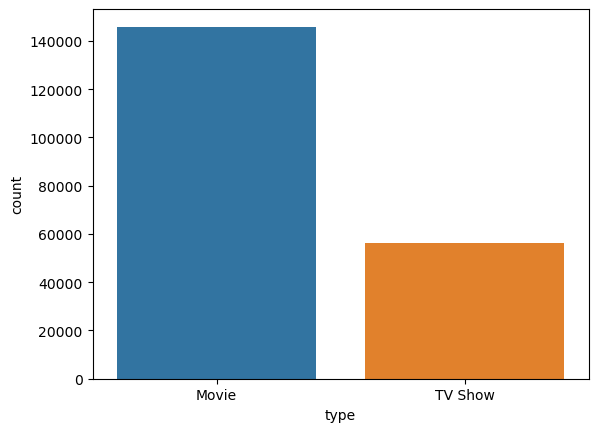

In [220]:
# for type
sns.countplot(data=final,x='type')
plt.show()

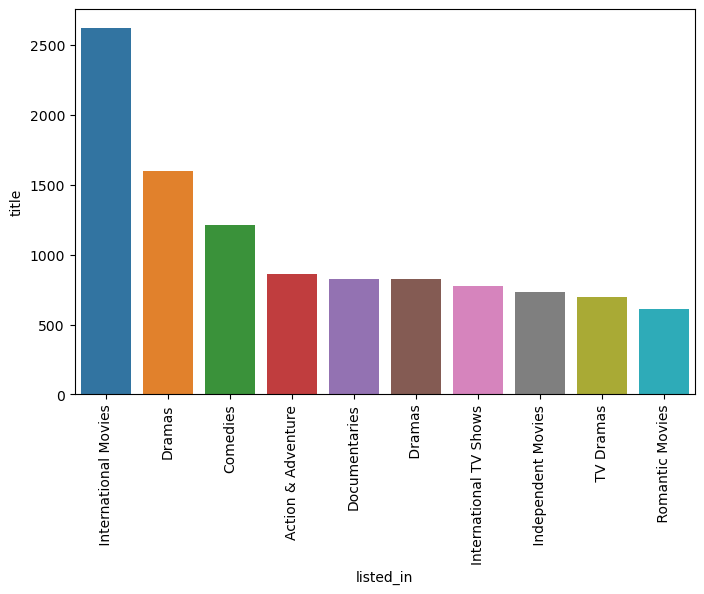

In [234]:
# for genre
top10_cat = final.groupby('listed_in')['title'].nunique().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (8,5))
sns.barplot(data = top10_cat, x = 'listed_in', y = 'title')
plt.xticks(rotation = 90)
plt.show() 

### Q2: Comparison of tv shows vs. movies. 
###    a. Find the number of movies produced in each country and pick the top 10 countries. 


In [140]:
# These are for both type that is movie and TV show
final.groupby('country')['title'].nunique().nlargest(10)



country
United States      3211
India              1008
Unknown country     831
United Kingdom      628
 United States      479
Canada              271
Japan               259
France              212
South Korea         211
 France             181
Name: title, dtype: int64

In [235]:
# For movie
t1=final[final['type']=='Movie']
f=t1.groupby('country')['title'].nunique().reset_index()
top10_movies=f.sort_values(by='title',ascending=False).head(10)
top10_movies=top10_movies[top10_movies['country']!='Unknown country']
top10_movies=top10_movies.rename(columns={'title':'count'})
top10_movies

,country,count
181,United States,2364
136,India,927
103,United States,388
180,United Kingdom,382
118,Canada,187
32,France,155
102,United Kingdom,152
127,France,148
18,Canada,132


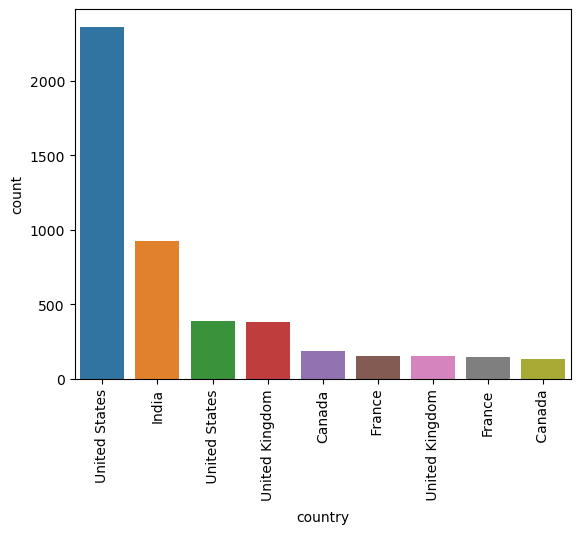

In [236]:
sns.barplot(data=top10_movies,x='country',y='count')
plt.xticks(rotation=90)
plt.show()


### b. Find the number of Tv-Shows produced in each country and pick the top 10 countries. 


In [238]:
# for TV show
t1=final[final['type']=='TV Show']
f=t1.groupby('country')['title'].nunique().reset_index()
top10_tv=f.sort_values(by='title',ascending=False).head(10)
top10_tv=top10_tv[top10_tv['country']!='Unknown country']
top10_tv=top10_tv.rename(columns={'title':'count'})

top10_tv

,country,count
100,United States,847
99,United Kingdom,246
69,Japan,174
90,South Korea,164
42,United States,91
50,Canada,84
64,India,81
94,Taiwan,70
60,France,64


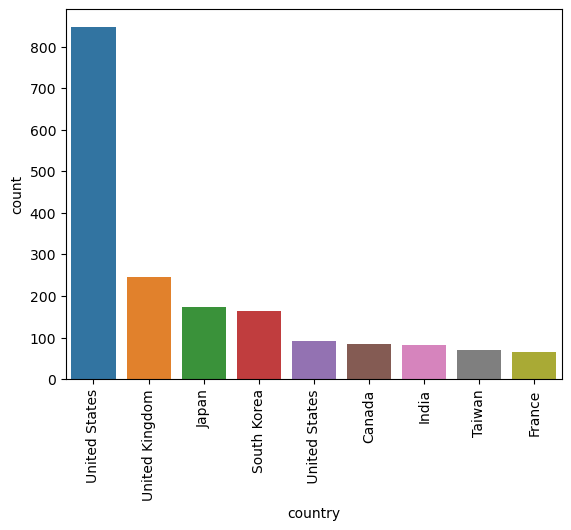

In [239]:
sns.barplot(data=top10_tv,x='country',y='count')
plt.xticks(rotation=90)
plt.show()


### Q3: What are the most common genres on Netflix (top 10)

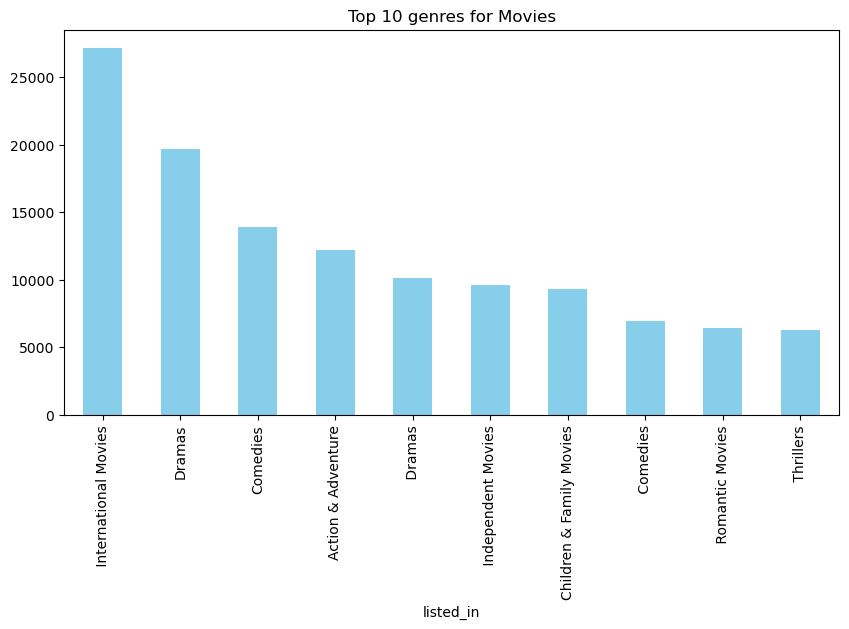

In [145]:
# for movies
plt.figure(figsize=(10,5))
final[final['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='bar',color='skyblue')
plt.title('Top 10 genres for Movies')
plt.show()


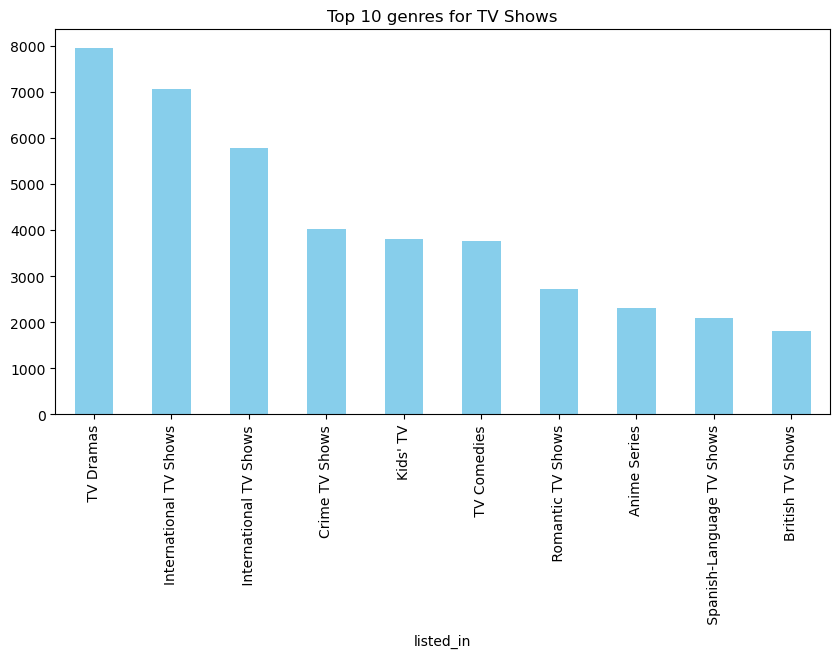

In [146]:
# for TV shows

plt.figure(figsize=(10,5))
final[final['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='bar',color='skyblue')
plt.title('Top 10 genres for TV Shows')
plt.show()

### Q4: Who are the top 10 actors in movies as well as in TV show 

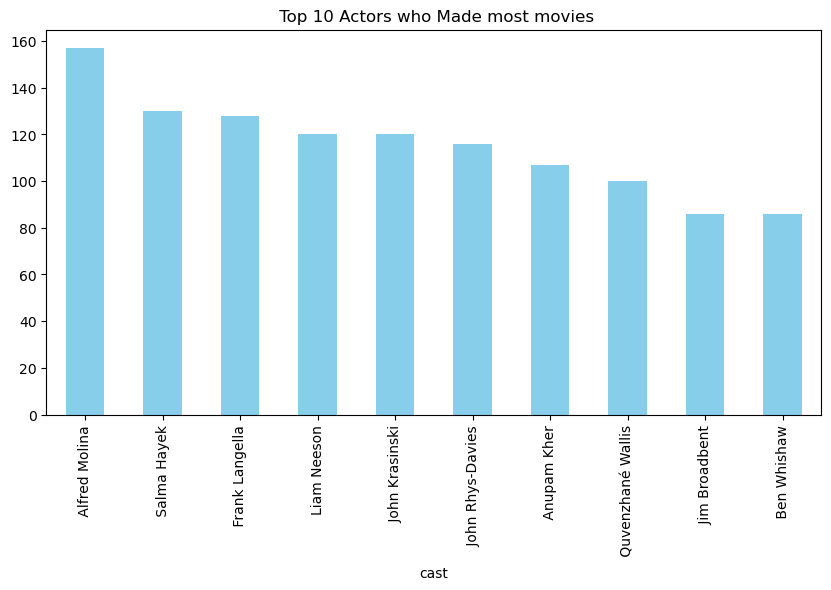

In [147]:
# Top actors for movies
plt.figure(figsize=(10,5))
final[(final['cast']!='Unknown cast') & (final['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='bar',color='skyblue')
plt.title(' Top 10 Actors who Made most movies')
plt.show()

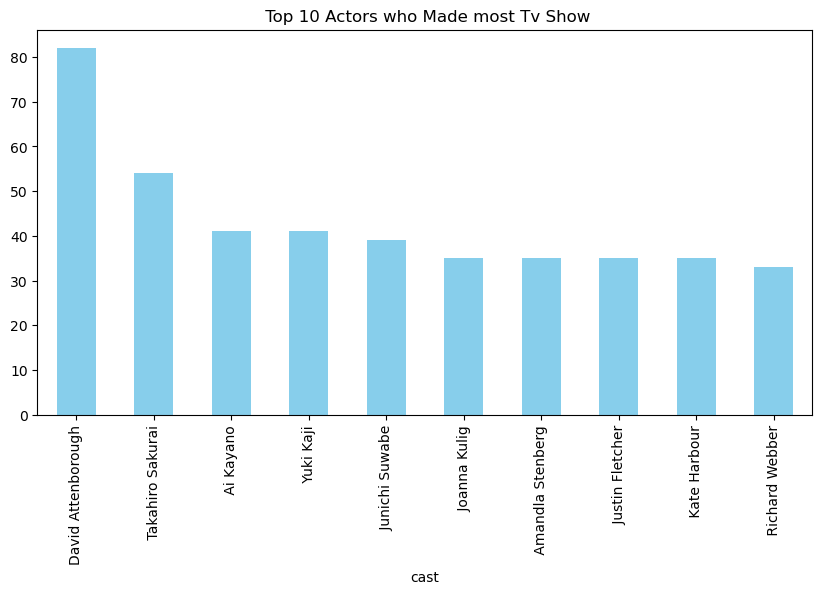

In [148]:
# Top actors for TV Show
plt.figure(figsize=(10,5))
final[(final['cast']!='Unknown cast') & (final['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='bar',color='skyblue')
plt.title(' Top 10 Actors who Made most Tv Show')
plt.show()

###  Q5 What is the best time to launch a TV show?

# a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies 

In [186]:
best_month = final[['date_added', 'type', 'title']]
best_month = best_month[best_month['type'] == 'Movie']
best_month = best_month.groupby(best_month['date_added'].dt.isocalendar().week)['title'].nunique().reset_index()
best_month.rename(columns = {'date_added' : 'Week', 'title': 'Number of movie released' }).sort_values(by = 'Number of movie released', ascending = False).head(12)

,week,Number of movie released
0,1,316
43,44,243
39,40,215
8,9,207
25,26,195
34,35,189
30,31,185
12,13,174
17,18,173
26,27,154


### b. Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies 


In [200]:
# for movies
t1=final[final['type']=='Movie']
month_movie=t1.groupby(pd.to_datetime(t1['date_added']).dt.month_name())['title'].nunique().reset_index()
month_movie=month_movie.rename(columns={'title':'count'})
month_movie.sort_values(by='count',ascending=False)


,date_added,count
5,July,565
0,April,550
2,December,547
4,January,546
10,October,545
7,March,529
1,August,519
11,September,519
9,November,498
6,June,492


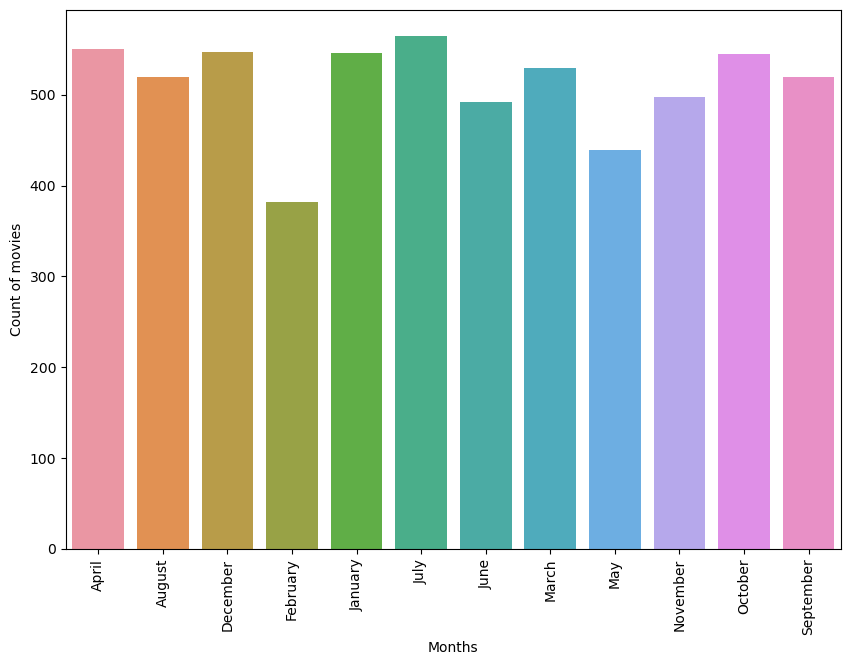

In [203]:
plt.figure(figsize=(10,7))
sns.barplot(data=month_movie,x='date_added',y='count')
plt.xlabel('Months')
plt.ylabel('Count of movies')
plt.xticks(rotation=90)
plt.show()

In [205]:
# for tv show
t2=final[final['type']=='TV Show']
month_tv=t2.groupby(pd.to_datetime(t2['date_added']).dt.month_name())['title'].nunique().reset_index()
month_tv

,date_added,title
0,April,214
1,August,236
2,December,266
3,February,181
4,January,202
5,July,262
6,June,236
7,March,213
8,May,193
9,November,207


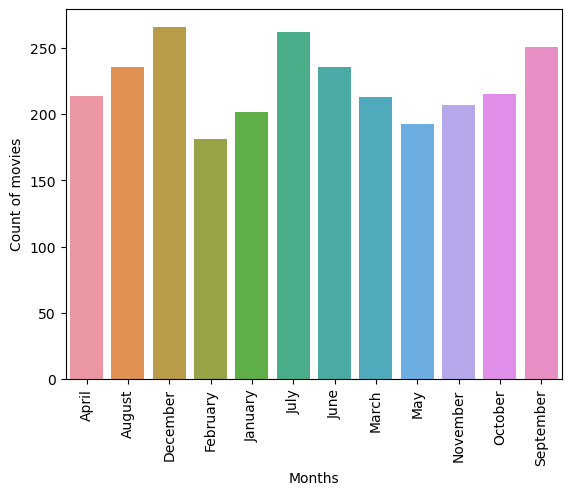

In [207]:
sns.barplot(data=month_tv,x='date_added',y='title')
plt.xlabel('Months')
plt.ylabel('Count of movies')
plt.xticks(rotation=90)
plt.show()

Best month to release Tv Show is December.

###  Q6.Analysis of actors/directors of different types of shows/movies. 

### a. Identify the top 10 actor who have appeared in most movies or TV shows.

In [214]:
top10_actor=final.groupby('cast')['title'].nunique().reset_index()
top10_actor.sort_values(by='title',ascending=False)
top10_actor=top10_actor[top10_actor['cast']!='Unknown cast']
top10_actor=top10_actor.rename(columns={'title':'count'})
actor_10=top10_actor.nlargest(10,columns='count')
actor_10

,cast,count
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28
23624,Om Puri,27
25410,Rajesh Kava,26
38445,Shah Rukh Khan,26
1905,Andrea Libman,25
4186,Boman Irani,25
23956,Paresh Rawal,25


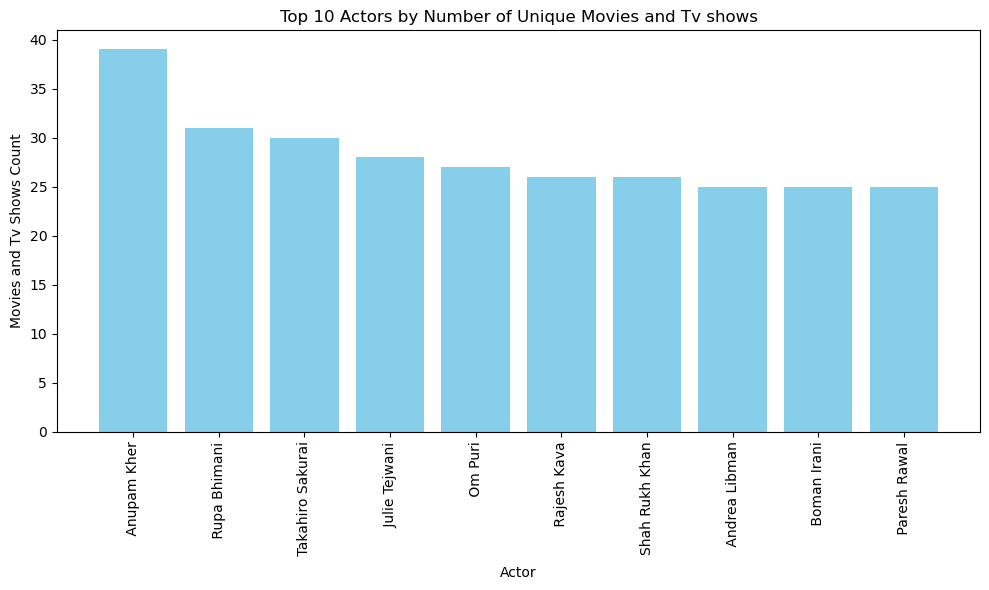

In [215]:
plt.figure(figsize=(10, 6))
plt.bar(actor_10['cast'], actor_10['count'], color='skyblue')
plt.xlabel('Actor')
plt.ylabel('Movies and Tv Shows Count')
plt.title('Top 10 Actors by Number of Unique Movies and Tv shows')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Anupam Kher has appeared in most movies or TV shows.

### b. Identify the top 10 directors who have appeared in most movies or TV shows. 


In [216]:

top10_director=final.groupby('director')['title'].nunique().reset_index()
top10_director.sort_values(by='title',ascending=False)
top10_director=top10_director[top10_director['director']!='Unknown director']
top10_director=top10_director.rename(columns={'title':'count'})
direcotr_10=top10_director.nlargest(10,columns='count')
direcotr_10


,director,count
4020,Rajiv Chilaka,22
261,Jan Suter,18
4067,Raúl Campos,18
3235,Marcus Raboy,16
4651,Suhas Kadav,16
2450,Jay Karas,15
1382,Cathy Garcia-Molina,13
2447,Jay Chapman,12
3306,Martin Scorsese,12
5075,Youssef Chahine,12


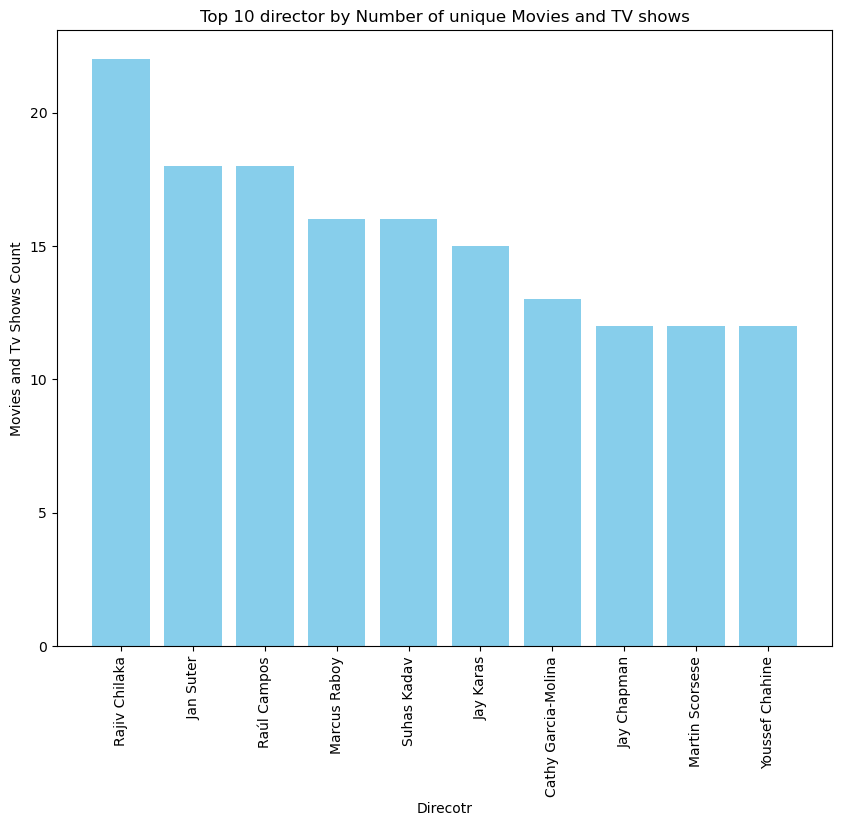

In [217]:
plt.figure(figsize=(10,8))
plt.bar(direcotr_10['director'],direcotr_10['count'],color='skyblue')
plt.title("Top 10 director by Number of unique Movies and TV shows")
plt.xlabel('Direcotr')
plt.ylabel('Movies and Tv Shows Count')
plt.xticks(rotation=90)
plt.show()


Rajiv Chilaka has directed  most movies or TV shows.

### Q7: Number of movies and TV shows added over the years

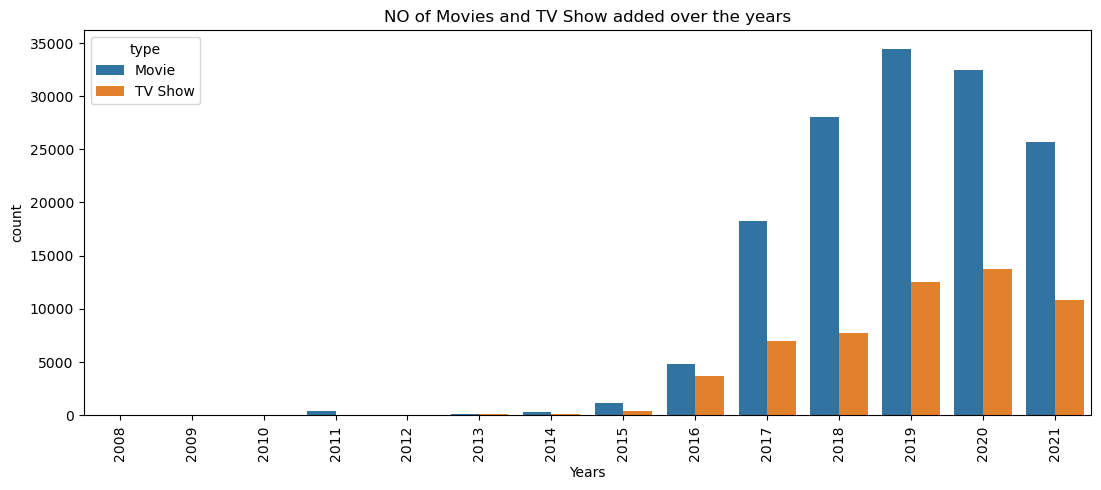

In [218]:
plt.figure(figsize=(13,5))
sns.countplot(data=final,x='added_year',hue='type')
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.title('NO of Movies and TV Show added over the years')
plt.show()


### 8. Find After how many days the movie will be added to Netflix after the release of the movie  

In [158]:
final['dif']=final['added_year']-final['release_year']

In [159]:
final['dif'].mode()[0]

0

### Q9. Which genre movies are more popular or produced more 

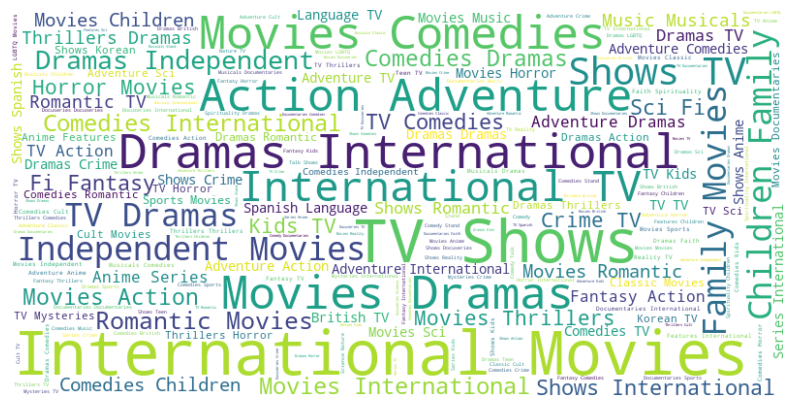

In [170]:
text = str(list(final['listed_in'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '')
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### 10 : Analysis on Duration

### For Movies

In [171]:
move_duration=final[(final['type']=='Movie') & (final['duration']!='Unknown duration')]

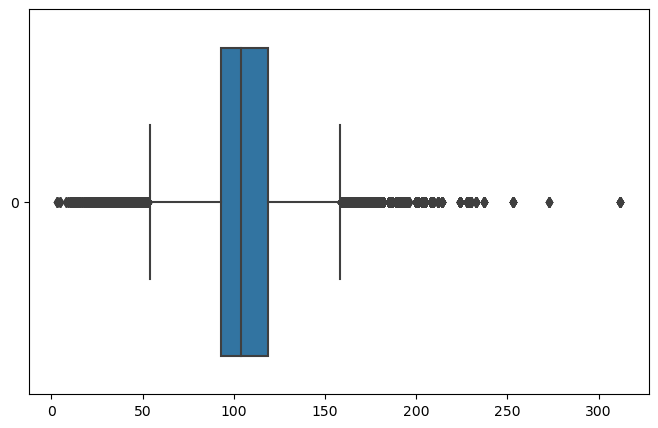

In [172]:
plt.figure(figsize=(8,5))
sns.boxplot(move_duration['duration'],orient='h')
plt.show()


### Recommendations: